In [452]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [453]:
import numpy as np
import pandas as pd

from pathlib import Path
import os


## Loading general info DataFrame

In [454]:
infocsvfile = '../data/processed/samples_10s.csv'
infocsv = pd.read_csv(infocsvfile)

In [455]:
infocsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3931 entries, 0 to 3930
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bpm                  3931 non-null   int64  
 1   time_signature       3931 non-null   object 
 2   audio_filename       3931 non-null   object 
 3   style                3931 non-null   object 
 4   duration_in_seconds  3931 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 153.7+ KB


In [456]:
infocsv.sample(5)

,bpm,time_signature,audio_filename,style,duration_in_seconds
807,120,4-4,samples_10s/jazz/9_jazz-march_120_beat_4-4_sam...,jazz,10.000000
959,94,4-4,samples_10s/rock/14_rock_94_beat_4-4_sample-1.wav,rock,10.000000
3894,90,4-4,samples_10s/rock/25_rock_90_beat_4-4_sample-4.wav,rock,7.332993
1729,124,4-4,samples_10s/afrocuban/13_afrocuban-calypso_124...,afrocuban,8.386984
3765,80,4-4,samples_10s/funk/6_funk_80_beat_4-4_sample-12.wav,funk,10.000000


In [457]:
infocsv.nunique()

bpm                      73
time_signature            5
audio_filename         3755
style                    17
duration_in_seconds     283
dtype: int64

In [458]:
infocsv.duration_in_seconds.sum() 

37169.36408163265

## Exploring drumming styles

In [459]:
df = infocsv.copy()

In [460]:
df['style'].unique()

array(['funk', 'soul', 'hiphop', 'pop', 'rock', 'neworleans', 'dance',
       'latin', 'afrocuban', 'reggae', 'jazz', 'country', 'gospel',
       'punk', 'afrobeat', 'blues', 'middleeastern'], dtype=object)

In [461]:
df.head()

,bpm,time_signature,audio_filename,style,duration_in_seconds
0,138,4-4,samples_10s/funk/1_funk-groove1_138_beat_4-4_s...,funk,10.000000
1,138,4-4,samples_10s/funk/1_funk-groove1_138_beat_4-4_s...,funk,10.000000
2,138,4-4,samples_10s/funk/1_funk-groove1_138_beat_4-4_s...,funk,7.825986
3,102,4-4,samples_10s/soul/10_soul-groove10_102_beat_4-4...,soul,10.000000
4,102,4-4,samples_10s/soul/10_soul-groove10_102_beat_4-4...,soul,10.000000


In [462]:
df['style'].value_counts()

rock             1182
latin             720
funk              461
jazz              435
hiphop            221
afrocuban         164
neworleans        158
soul              157
afrobeat           82
pop                69
dance              67
reggae             64
punk               53
country            31
blues              30
middleeastern      23
gospel             14
Name: style, dtype: int64

In [463]:
df[df['style'] == 'hiphop'].sort_values(by='duration_in_seconds').head(50)

,bpm,time_signature,audio_filename,style,duration_in_seconds
1479,92,4-4,samples_10s/hiphop/32_hiphop_92_beat_4-4_sampl...,hiphop,0.434989
3301,70,4-4,samples_10s/hiphop/92_hiphop_70_beat_4-4_sampl...,hiphop,0.564989
3218,67,4-4,samples_10s/hiphop/38_hiphop_67_beat_4-4_sampl...,hiphop,0.850000
2889,140,4-4,samples_10s/hiphop/123_hiphop_140_beat_4-4_sam...,hiphop,1.428980
2775,100,4-4,samples_10s/hiphop/22_hiphop_100_beat_4-4_samp...,hiphop,1.450000
2772,100,4-4,samples_10s/hiphop/18_hiphop_100_beat_4-4_samp...,hiphop,1.600000
3631,70,4-4,samples_10s/hiphop/23_hiphop_70_beat_4-4_sampl...,hiphop,2.000000
3058,75,4-4,samples_10s/hiphop/92_hiphop_75_beat_4-4_sampl...,hiphop,2.792993
1477,92,4-4,samples_10s/hiphop/31_hiphop_92_beat_4-4_sampl...,hiphop,3.042993
3448,94,4-4,samples_10s/hiphop/14_hiphop_94_beat_4-4_sampl...,hiphop,3.403991


In [464]:
a = 9.99
b = 10.0000

In [465]:
def fun(b, rtol, atol):
    return np.abs(b) * rtol + atol 

In [466]:
rtol=1e-01
atol=1e-01
b = 10.000
fun(b, rtol, atol)

1.1

### Filtering samples that are at least $x$ seconds duration

**$\mathbf{x} = $ 7.0 seconds**

In [467]:
def filtering_samples(audio_df:pd.DataFrame, duration:float=7.0) -> pd.DataFrame:
    
    filtered_df = audio_df[audio_df.duration_in_seconds >= duration]
    
    return filtered_df

In [468]:
for duration in np.arange(1.0, 11.0):
    print(duration, filtering_samples(df, duration=duration).shape[0], df.shape[0])

1.0 3894 3931
2.0 3863 3931
3.0 3805 3931
4.0 3778 3931
5.0 3712 3931
6.0 3681 3931
7.0 3632 3931
8.0 3589 3931
9.0 3541 3931
10.0 3500 3931


In [533]:
# df_10s = df[df.duration_in_seconds.apply(lambda x: np.allclose(x, 10.000, rtol=1e-02))]
df_samples = filtering_samples(df, duration=7.0)
df_samples 

,bpm,time_signature,audio_filename,style,duration_in_seconds
0,138,4-4,samples_10s/funk/1_funk-groove1_138_beat_4-4_s...,funk,10.000000
1,138,4-4,samples_10s/funk/1_funk-groove1_138_beat_4-4_s...,funk,10.000000
2,138,4-4,samples_10s/funk/1_funk-groove1_138_beat_4-4_s...,funk,7.825986
3,102,4-4,samples_10s/soul/10_soul-groove10_102_beat_4-4...,soul,10.000000
4,102,4-4,samples_10s/soul/10_soul-groove10_102_beat_4-4...,soul,10.000000
...,...,...,...,...,...
3922,100,4-4,samples_10s/rock/5_rock_100_beat_4-4_sample-7.wav,rock,10.000000
3925,100,4-4,samples_10s/rock/7_rock_100_beat_4-4_sample-1.wav,rock,10.000000
3926,100,4-4,samples_10s/rock/7_rock_100_beat_4-4_sample-2.wav,rock,10.000000
3928,100,4-4,samples_10s/rock/8_rock_100_beat_4-4_sample-1.wav,rock,10.000000


In [470]:
df[df['style'] == 'hiphop'].sort_values(by='duration_in_seconds').head(10)

,bpm,time_signature,audio_filename,style,duration_in_seconds
1479,92,4-4,samples_10s/hiphop/32_hiphop_92_beat_4-4_sampl...,hiphop,0.434989
3301,70,4-4,samples_10s/hiphop/92_hiphop_70_beat_4-4_sampl...,hiphop,0.564989
3218,67,4-4,samples_10s/hiphop/38_hiphop_67_beat_4-4_sampl...,hiphop,0.850000
2889,140,4-4,samples_10s/hiphop/123_hiphop_140_beat_4-4_sam...,hiphop,1.428980
2775,100,4-4,samples_10s/hiphop/22_hiphop_100_beat_4-4_samp...,hiphop,1.450000
2772,100,4-4,samples_10s/hiphop/18_hiphop_100_beat_4-4_samp...,hiphop,1.600000
3631,70,4-4,samples_10s/hiphop/23_hiphop_70_beat_4-4_sampl...,hiphop,2.000000
3058,75,4-4,samples_10s/hiphop/92_hiphop_75_beat_4-4_sampl...,hiphop,2.792993
1477,92,4-4,samples_10s/hiphop/31_hiphop_92_beat_4-4_sampl...,hiphop,3.042993
3448,94,4-4,samples_10s/hiphop/14_hiphop_94_beat_4-4_sampl...,hiphop,3.403991


In [471]:
df_samples[df_samples['style'] == 'hiphop'].sort_values(by='duration_in_seconds').head(10)

,bpm,time_signature,audio_filename,style,duration_in_seconds
1494,110,4-4,samples_10s/hiphop/40_hiphop_110_beat_4-4_samp...,hiphop,7.454989
3753,90,4-4,samples_10s/hiphop/5_hiphop_90_beat_4-4_sample...,hiphop,8.000000
3061,75,4-4,samples_10s/hiphop/93_hiphop_75_beat_4-4_sampl...,hiphop,8.800000
1460,92,4-4,samples_10s/hiphop/25_hiphop_92_beat_4-4_sampl...,hiphop,9.130000
2783,100,4-4,samples_10s/hiphop/40_hiphop_100_beat_4-4_samp...,hiphop,9.200000
1466,92,4-4,samples_10s/hiphop/26_hiphop_92_beat_4-4_sampl...,hiphop,9.983991
3294,70,4-4,samples_10s/hiphop/92_hiphop_70_beat_4-4_sampl...,hiphop,10.000000
3444,94,4-4,samples_10s/hiphop/14_hiphop_94_beat_4-4_sampl...,hiphop,10.000000
3445,94,4-4,samples_10s/hiphop/14_hiphop_94_beat_4-4_sampl...,hiphop,10.000000
3446,94,4-4,samples_10s/hiphop/14_hiphop_94_beat_4-4_sampl...,hiphop,10.000000


In [472]:
df.shape, df_samples.shape

((3931, 5), (3632, 5))

In [473]:
df_samples['style'].value_counts(normalize=True)

rock             0.287996
latin            0.189703
funk             0.118943
jazz             0.112059
hiphop           0.053965
afrocuban        0.043502
neworleans       0.041024
soul             0.039372
afrobeat         0.021751
dance            0.017896
pop              0.017621
reggae           0.016795
punk             0.013216
country          0.008260
blues            0.007985
middleeastern    0.006057
gospel           0.003855
Name: style, dtype: float64

### Train-Val-Test stratified split

In [422]:
# df_rand = df_new.sample(frac=1., random_state=7)
# df_rand

,bpm,time_signature,audio_filename,style,duration_in_seconds
2356,141,4-4,samples_10s/reggae/4_reggae_141_beat_4-4_sampl...,reggae,10.0
383,125,4-4,samples_10s/rock/51_rock-shuffle_125_beat_4-4_...,rock,10.0
3840,120,4-4,samples_10s/rock/15_rock_120_beat_4-4_sample-1...,rock,10.0
2758,100,4-4,samples_10s/hiphop/16_hiphop_100_beat_4-4_samp...,hiphop,10.0
478,84,4-4,samples_10s/neworleans/82_neworleans-funk_84_b...,neworleans,10.0
...,...,...,...,...,...
1747,112,4-4,samples_10s/latin/14_latin-brazilian-songo_112...,latin,10.0
2746,100,4-4,samples_10s/jazz/14_jazz_100_beat_4-4_sample-6...,jazz,10.0
569,120,4-4,samples_10s/gospel/142_gospel_120_beat_4-4_sam...,gospel,10.0
1285,110,4-4,samples_10s/jazz/9_jazz-swing_110_beat_4-4_sam...,jazz,10.0


In [492]:
# It will raise a SettingWithCopyWarning if we do not .copy() 
# df_style = df_rand[df_rand['style'] == 'rock'] 
# df_style = df_rand.loc[df_rand['style'] == 'rock'] 

df_style = df_samples.loc[df_samples['style'] == 'rock'].copy()
df_style.head(10)

,bpm,time_signature,audio_filename,style,duration_in_seconds
34,65,4-4,samples_10s/rock/8_rock-groove8_65_beat_4-4_sa...,rock,10.000000
35,65,4-4,samples_10s/rock/8_rock-groove8_65_beat_4-4_sa...,rock,10.000000
36,65,4-4,samples_10s/rock/8_rock-groove8_65_beat_4-4_sa...,rock,10.000000
37,65,4-4,samples_10s/rock/8_rock-groove8_65_beat_4-4_sa...,rock,10.000000
38,65,4-4,samples_10s/rock/8_rock-groove8_65_beat_4-4_sa...,rock,10.000000
39,65,4-4,samples_10s/rock/8_rock-groove8_65_beat_4-4_sa...,rock,9.013991
221,140,4-4,samples_10s/rock/202_rock-halftime_140_beat_4-...,rock,10.000000
222,140,4-4,samples_10s/rock/202_rock-halftime_140_beat_4-...,rock,10.000000
223,140,4-4,samples_10s/rock/202_rock-halftime_140_beat_4-...,rock,10.000000
224,140,4-4,samples_10s/rock/202_rock-halftime_140_beat_4-...,rock,10.000000


In [500]:
# .loc is end-inclusive when slicing while .iloc is end-exclusive, .loc finds the actual index number

df_style.loc[34:39, 'duration_in_seconds'], df_style.iloc[0:6, -1]

(34    10.000000
 35    10.000000
 36    10.000000
 37    10.000000
 38    10.000000
 39     9.013991
 Name: duration_in_seconds, dtype: float64,
 34    10.000000
 35    10.000000
 36    10.000000
 37    10.000000
 38    10.000000
 39     9.013991
 Name: duration_in_seconds, dtype: float64)

#### Splitting per style of drumming for stratified split

In [502]:
VAL_SIZE = 0.15
TEST_SIZE = 0.15
val_size = int(len(df_style.index.values) * VAL_SIZE)
test_size = int(len(df_style.index.values) * VAL_SIZE)
train_size = len(df_style.index.values) - val_size - test_size
train_idx = idx_style[:train_size]
val_idx = idx_style[train_size : train_size + val_size]
test_idx = idx_style[train_size + val_size: ]

df_style.loc[:, 'data_type'] = pd.Series(dtype='object')

df_style.iloc[:train_size, -1] = 'train'
df_style.iloc[train_size: train_size + val_size, -1] = 'validation'
df_style.iloc[train_size + val_size:, -1 ] = 'test'

print(df_style.data_type.value_counts())

print(train_size, train_size + val_size)
train_idx.shape[0]/idx_style.shape[0], val_idx.shape[0]/idx_style.shape[0], test_idx.shape[0]/idx_style.shape[0]

train         734
validation    156
test          156
Name: data_type, dtype: int64
734 890


(0.7017208413001912, 0.1491395793499044, 0.1491395793499044)

In [61]:
# X = df_rand['audio_filename'].values
# y = df_rand['style'].values

# # np.random.permutation shuffles the indices by having an int
# perm = np.random.permutation(len(X))
# X[perm], y[perm]

# # np.random.shuffle modifies X in place, changing X
# np.random.shuffle(X)

### Putting all together 

In [554]:
def train_val_test_split_strat(df_style:pd.DataFrame, val_size:float, test_size:float, 
                               random_state=None) -> pd.DataFrame:
    '''
    df_style:
    
    
    output: df_style with added column 'data_type'
    '''
    
    val_size = int(len(df_style.index.values) * val_size) 
    test_size = int(len(df_style.index.values) * test_size)
    train_size = len(df_style.index.values) - val_size - test_size
    
    df_style = df_style.sample(frac=1., random_state=random_state)
    df_style.iloc[:train_size, -1] = 'train'
    df_style.iloc[train_size: train_size + val_size, -1] = 'validation'
    df_style.iloc[train_size + val_size:, -1 ] = 'test'
    
    return df_style
   

    

In [555]:
df_samples['style'].unique()

array(['funk', 'soul', 'hiphop', 'pop', 'rock', 'neworleans', 'dance',
       'latin', 'afrocuban', 'reggae', 'jazz', 'country', 'gospel',
       'punk', 'afrobeat', 'blues', 'middleeastern'], dtype=object)

In [556]:
df_samples

,bpm,time_signature,audio_filename,style,duration_in_seconds
0,138,4-4,samples_10s/funk/1_funk-groove1_138_beat_4-4_s...,funk,10.000000
1,138,4-4,samples_10s/funk/1_funk-groove1_138_beat_4-4_s...,funk,10.000000
2,138,4-4,samples_10s/funk/1_funk-groove1_138_beat_4-4_s...,funk,7.825986
3,102,4-4,samples_10s/soul/10_soul-groove10_102_beat_4-4...,soul,10.000000
4,102,4-4,samples_10s/soul/10_soul-groove10_102_beat_4-4...,soul,10.000000
...,...,...,...,...,...
3922,100,4-4,samples_10s/rock/5_rock_100_beat_4-4_sample-7.wav,rock,10.000000
3925,100,4-4,samples_10s/rock/7_rock_100_beat_4-4_sample-1.wav,rock,10.000000
3926,100,4-4,samples_10s/rock/7_rock_100_beat_4-4_sample-2.wav,rock,10.000000
3928,100,4-4,samples_10s/rock/8_rock_100_beat_4-4_sample-1.wav,rock,10.000000


In [560]:
styles = list(df_samples['style'].unique())
df_samples_ = df_samples.copy()
df_samples_.loc[:, 'data_type'] = pd.Series(dtype='object')

VAL_SIZE = 0.15
TEST_SIZE = 0.15
random_state = 7

df_datatype = pd.DataFrame()

for style in styles:
    df_style = df_samples_.loc[df_samples_['style'] == style].copy()
    df_style = train_val_test_split_strat(df_style, VAL_SIZE, TEST_SIZE, random_state=random_state)
    df_datatype = pd.concat([df_datatype, df_style])

df_datatype = df_datatype.sample(frac=1., random_state=random_state)


In [558]:
df_datatype['data_type'].value_counts(normalize=True)

train         0.704295
validation    0.147852
test          0.147852
Name: data_type, dtype: float64

In [559]:
for type_ in ['train', 'validation', 'test']:
    display(df_datatype.loc[df_datatype['data_type'] == type_]['style'].value_counts(normalize=True))

rock             0.286943
latin            0.188819
funk             0.118843
jazz             0.111415
hiphop           0.053948
afrocuban        0.043784
neworleans       0.041048
soul             0.039484
afrobeat         0.022283
dance            0.018374
pop              0.017983
reggae           0.016810
punk             0.013292
country          0.008600
blues            0.008210
middleeastern    0.006255
gospel           0.003909
Name: style, dtype: float64

rock             0.290503
latin            0.191806
funk             0.119181
jazz             0.113594
hiphop           0.054004
afrocuban        0.042831
neworleans       0.040968
soul             0.039106
afrobeat         0.020484
dance            0.016760
reggae           0.016760
pop              0.016760
punk             0.013035
country          0.007449
blues            0.007449
middleeastern    0.005587
gospel           0.003724
Name: style, dtype: float64

rock             0.290503
latin            0.191806
funk             0.119181
jazz             0.113594
hiphop           0.054004
afrocuban        0.042831
neworleans       0.040968
soul             0.039106
afrobeat         0.020484
dance            0.016760
reggae           0.016760
pop              0.016760
punk             0.013035
country          0.007449
blues            0.007449
middleeastern    0.005587
gospel           0.003724
Name: style, dtype: float64

In [40]:
os.path.split(files_list[0])

('samples_10s/latin', '2_latin-chacarera_118_beat_4-4_sample-1.wav')

In [54]:
Path(files_list[0]).parents[0].stem

'latin'

In [61]:
style_ = 'rock'


(3931, 5)

## Exploring the features 

In [155]:
from drumbeatid.soundprocessing.soundfeatures import Audio
from drumbeatid.params import * 

import librosa

import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
random_state = 3

In [105]:
sample_1 = df_10s[df_10s.duration_in_seconds < 10.0].sample(5, random_state=random_state)
display(sample_1)
sample_2 = df_10s.sample(5, random_state=random_state)
display(sample_2)

,bpm,time_signature,audio_filename,style,duration_in_seconds
3011,100,4-4,samples_10s/funk/77_funk_100_beat_4-4_sample-1...,funk,9.600000
1514,100,4-4,samples_10s/rock/7_rock_100_beat_4-4_sample-2.wav,rock,9.200000
1365,120,4-4,samples_10s/jazz/32_jazz_120_beat_4-4_sample-1...,jazz,9.500000
2931,75,4-4,samples_10s/rock/30_rock_75_beat_4-4_sample-1.wav,rock,9.600000
1134,182,4-4,samples_10s/jazz/4_jazz-linear_182_beat_4-4_sa...,jazz,9.010998


,bpm,time_signature,audio_filename,style,duration_in_seconds
801,120,4-4,samples_10s/jazz/9_jazz-march_120_beat_4-4_sam...,jazz,10.0
463,170,4-4,samples_10s/dance/80_dance-breakbeat_170_beat_...,dance,10.0
1824,136,4-4,samples_10s/rock/16_rock_136_beat_4-4_sample-2...,rock,10.0
191,78,4-4,samples_10s/reggae/184_reggae_78_beat_4-4_samp...,reggae,10.0
488,157,3-4,samples_10s/latin/1_latin-chacarera_157_beat_3...,latin,10.0


In [110]:
samples_df = pd.concat([sample_1, sample_2]).sample(frac=1, random_state=random_state)
samples_df

,bpm,time_signature,audio_filename,style,duration_in_seconds
801,120,4-4,samples_10s/jazz/9_jazz-march_120_beat_4-4_sam...,jazz,10.000000
1134,182,4-4,samples_10s/jazz/4_jazz-linear_182_beat_4-4_sa...,jazz,9.010998
1514,100,4-4,samples_10s/rock/7_rock_100_beat_4-4_sample-2.wav,rock,9.200000
1365,120,4-4,samples_10s/jazz/32_jazz_120_beat_4-4_sample-1...,jazz,9.500000
488,157,3-4,samples_10s/latin/1_latin-chacarera_157_beat_3...,latin,10.000000
463,170,4-4,samples_10s/dance/80_dance-breakbeat_170_beat_...,dance,10.000000
1824,136,4-4,samples_10s/rock/16_rock_136_beat_4-4_sample-2...,rock,10.000000
3011,100,4-4,samples_10s/funk/77_funk_100_beat_4-4_sample-1...,funk,9.600000
2931,75,4-4,samples_10s/rock/30_rock_75_beat_4-4_sample-1.wav,rock,9.600000
191,78,4-4,samples_10s/reggae/184_reggae_78_beat_4-4_samp...,reggae,10.000000


In [135]:
samples_df.audio_filename.iloc[1]

'samples_10s/jazz/4_jazz-linear_182_beat_4-4_sample-27.wav'

In [136]:
audiofile_rock = DATA_PATH / 'processed' / samples_df.audio_filename.iloc[2]
audiofile_jazz = DATA_PATH / 'processed' / samples_df.audio_filename.iloc[1]
print(audiofile_jazz.exists(), audiofile_rock.exists())

True True


In [147]:
int(10.45 * 22050)

230422

(198450,)


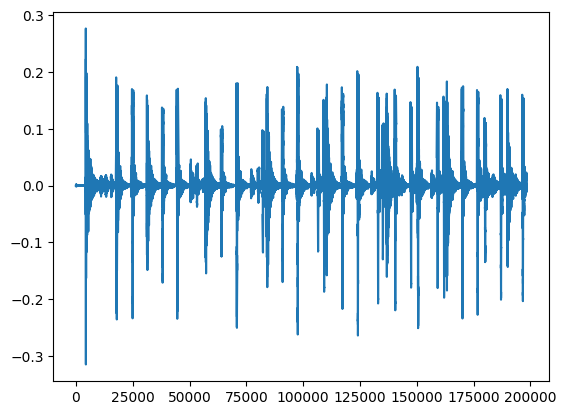

In [142]:
waveform, sr = librosa.load(audiofile_rock, duration=9.0)
print(waveform.shape)
plt.plot(waveform)

(198693,)


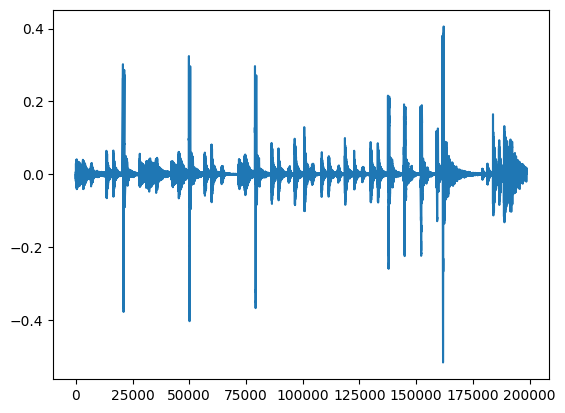

In [140]:
waveform, sr = librosa.load(audiofile_jazz, duration=10.)
print(waveform.shape)
plt.plot(waveform)

In [150]:
audio_jazz = Audio(audiofile_jazz, sr=22050, duration=10.)

In [162]:
audio_jazz.waveform[-20:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [152]:
audio_jazz.samplingrate

22050

<AxesSubplot:>

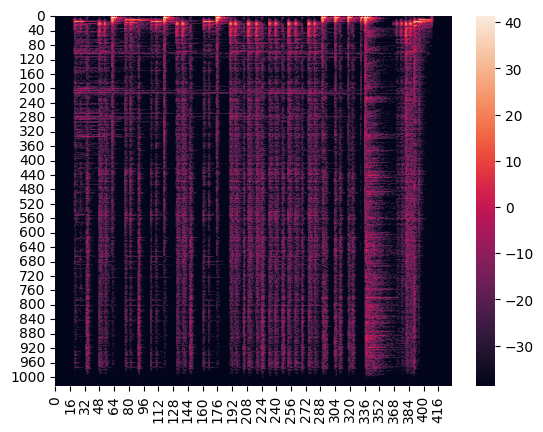

In [156]:
sns.heatmap(audio_jazz.calculate_spectrogramstft())

<AxesSubplot:>

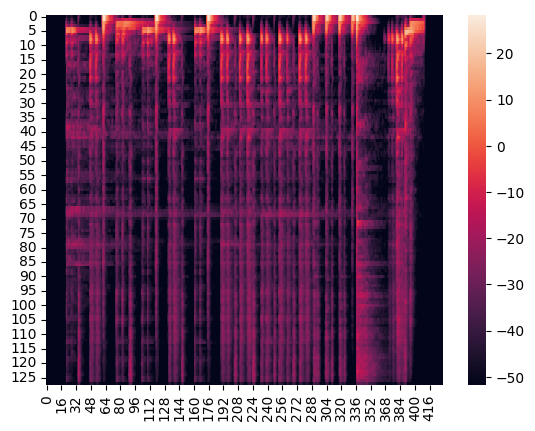

In [158]:
sns.heatmap(audio_jazz.calculate_melspec())

In [159]:
audio_rock = Audio(audiofile_rock, sr=22050, duration=10.0)

In [163]:
audio_rock.waveform.shape

(220500,)

In [167]:
len(audio_rock.waveform)/

220500

<AxesSubplot:>

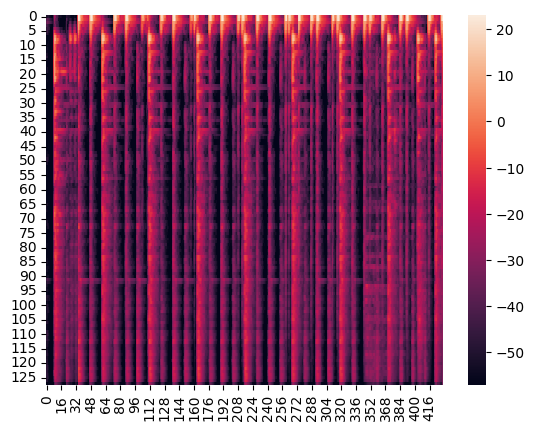

In [165]:
sns.heatmap(audio_rock.calculate_melspec())